In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [2]:
t=np.loadtxt('profile_gas.dat')
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9))*1e-10

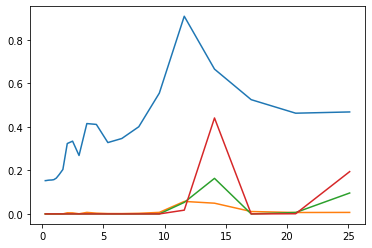

In [3]:
plt.plot(t[:,0],t[:,1])
plt.plot(t[:,0],t[:,2])
plt.plot(t[:,0],t[:,3])
plt.plot(t[:,0],t[:,4])

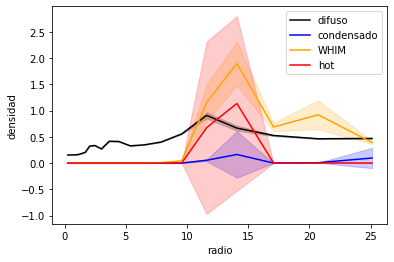

In [4]:
1|plt.fill_between(t[:,0],t[:,1]-t[:,2],t[:,1]+t[:,2],color='black',alpha=.2)
plt.plot(t[:,0],t[:,1],label='difuso',color='black')
plt.fill_between(t[:,0],t[:,3]-t[:,4],t[:,3]+t[:,4],color='blue',alpha=.2)
plt.plot(t[:,0],t[:,3],label='condensado',color='blue')
plt.fill_between(t[:,0],t[:,5]-t[:,6],t[:,5]+t[:,6],color='orange',alpha=.2)
plt.plot(t[:,0],t[:,5],label='WHIM',color='orange')
plt.fill_between(t[:,0],t[:,7]-t[:,8],t[:,7]+t[:,8],color='red',alpha=.2)
plt.plot(t[:,0],t[:,7],label='hot',color='red')
#plt.semilogx()
plt.xlabel('radio')
plt.ylabel('densidad')
plt.legend()
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/ProfFases_R.png',format='png')

In [159]:
t=np.loadtxt('particlesprofile.dat')
masa_gas=0.018173

Text(0, 0.5, '$\\rho $')

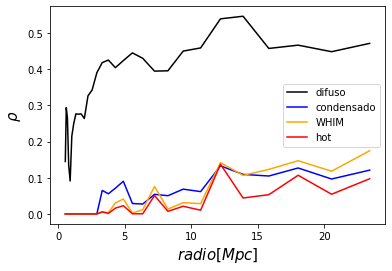

In [162]:
plt.plot(t[:,0],t[:,1]*masa_gas/t[:,5],color='black',label='difuso')
plt.plot(t[:,0],t[:,2]*masa_gas/t[:,5],color='blue',label='condensado')
plt.plot(t[:,0],t[:,3]*masa_gas/t[:,5],color='orange',label='WHIM')
plt.plot(t[:,0],t[:,4]*masa_gas/t[:,5],color='red',label='hot')
plt.legend()
plt.xlabel("$radio [Mpc]$",size=15)
plt.ylabel(r"$\rho $",size=15)

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/FasesProf_R.png',format='png')

In [132]:
print('particulas difusa',np.sum(t[:,1]))
print('particulas condensadas',np.sum(t[:,2]))
print('particulas WHIM',np.sum(t[:,3]))
print('particulas hot',np.sum(t[:,4]))

particulas difusa 1842754.0
particulas condensadas 2425859.0
particulas WHIM 2426530.0
particulas hot 1458325.0


In [210]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path+'snapshot_050')

In [134]:
s0.loadable_keys()

['idgn', 'iord', 'mass', 'vel', 'idch', 'pos']

In [211]:
gs=s0.gas
ne=gs['ne']
u=gs['u']
rho=gs['rho']
pos=gs['pos']

In [212]:
print(u[199],u[12121211])

89.0334 49348.227


In [213]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu=(1.0-yHe)/(1+yHe+ne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
temp=(5./3.-1.)*u*vv*mu*mp/kcgs

In [214]:
#S
xc=254.309479
yc=247.889618
zc=250.636566
#R
#xc=252.404449
#yc=250.439102
#zc=245.898346


rl1=.5
rl2=20
tlim=10**5
dlim=10**2
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)

In [221]:
cut1, = np.where((temp<tlim) & (rho/dgs<dlim) & (r<rl2) & (r>rl1) & (abs(pos[:,0]-xc)<2) )
cut2, = np.where( (temp < tlim) & ((rho/dgs)>=dlim) & (r<rl2) & (r>rl1)& (abs(pos[:,0]-xc)<2))
cut3, = np.where((temp>=tlim) & (rho/dgs<dlim) & (r<rl2) & (r>rl1)& (abs(pos[:,0]-xc)<2))
cut4, = np.where((temp>=tlim) & (rho/dgs>=dlim) & (r<rl2) & (r>rl1)& (abs(pos[:,0]-xc)<2))

In [218]:
print(len(cut1))
print(len(cut2))
print(len(cut3))
print(len(cut4))

156583
84820
228264
164995


Text(0.5, 1.0, 'HOT')

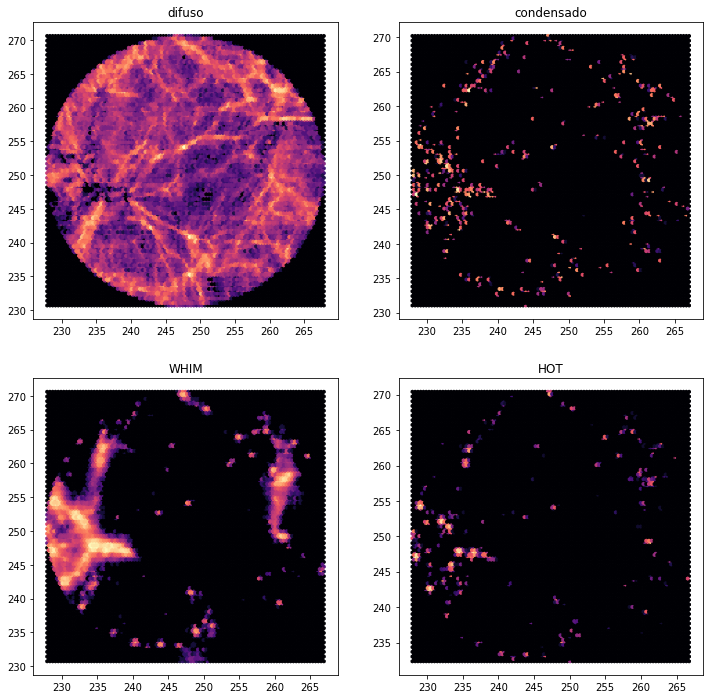

In [222]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.hexbin(pos[cut1,1],pos[cut1,2],cmap='magma',bins='log')
plt.title('difuso')

plt.subplot(222)
plt.hexbin(pos[cut2,1],pos[cut2,2],cmap='magma',bins='log')
plt.title('condensado')

plt.subplot(223)
plt.hexbin(pos[cut3,1],pos[cut3,2],cmap='magma',bins='log')
plt.title('WHIM')

plt.subplot(224)
plt.hexbin(pos[cut4,1],pos[cut4,2],cmap='magma',bins='log')
plt.title('HOT')

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/FasesHexbin_S.png',format='png')